# Welcome to Week 4🌏 – Echo Classification using Unsupervised Learning

This notebook presents the Week 4 assignment for the *AI for Earth Observation* module.

The objective is to classify radar echo waveforms into two surface types: **leads** and **sea ice**, using unsupervised learning methods. The analysis builds on the provided notebook *Chapter1_Unsupervised_Learning_Methods_Michel.ipynb*.






-----------------------------------------------------------------

This notebook introduces the use of unsupervised learning techniques with Earth observation data. Unsupervised learning is useful when labelled data is not available, as it allows patterns and structures in the data to be discovered autamatically. In this notebook, satellite measurements are explored to see how different surface types can be identified based only on their signal characteristics.

**By working through this notebook, you will be guided through the full process of preparing satellite data, extracting useful features, and applying clustering methods.** No prior experience with machine learning will be assumed, and the focus is on understanding how the data behaves and how simple models can be used to explore it.


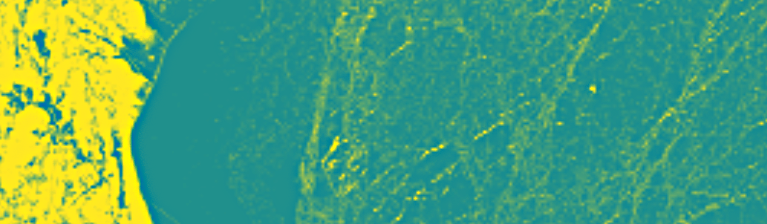

# **1. Introduction**:👋
This repository contains a practical notebook that demonstrates **unsupervised learning** methods (mainly **K-Means** and **Gaussian Mixture Models / GMM**) applied to two EO tasks:

1. **Sentinel-2 optical image clustering** (sea ice vs. leads)
2. **Sentinel-3 altimetry waveform clustering** (sea ice vs. leads)

The goal is to show how unsupervised models can group pixels/measurements into meaningful classes **without labels**.

---

## What’s in this repo
- `Chapter1_Unsupervised_Learning_Methods_Michel.ipynb`  
  Main notebook (the full workflow + plots).

---

## Requirements
You can run the notebook in **Google Colab** or locally.

### Python packages
- `numpy`
- `matplotlib`
- `scikit-learn`
- `rasterio` (for Sentinel-2 GeoTIFF)
- `netCDF4` (for Sentinel-3 altimetry NetCDF)

### Install (local)
```bash
pip install numpy matplotlib scikit-learn rasterio netCDF4


## **1.2 Lets get set up:** Mounting Google Drive and downloading packages

In [1]:
#Lets mount Google Drive so we can read in your saved files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Next we will install rasterio to read data stored as GeoTiffs
pip install rasterio

In [3]:
# We can also install netCDF4 to read data stored as NetCDF files
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.9 MB/s eta 0:00:00


# **2. K-means clustering theory and Basic code **

## Introduction to Unsupervised Learning Methods {cite}`bishop2006pattern`

### Introduction to K-means Clustering

K-means clustering is a type of unsupervised learning algorithm used for partitioning a dataset into a set of k groups (or clusters), where k represents the number of groups pre-specified by the analyst. It classifies the data points based on the similarity of the features of the data {cite}`macqueen1967some`. The basic idea is to define k centroids, one for each cluster, and then assign each data point to the nearest centroid, while keeping the centroids as small as possible.

### Why K-means for Clustering?

K-means clustering is particularly well-suited for applications where:

- **The structure of the data is not known beforehand**: K-means doesn’t require any prior knowledge about the data distribution or structure, making it ideal for exploratory data analysis.
- **Simplicity and scalability**: The algorithm is straightforward to implement and can scale to large datasets relatively easily.

### Key Components of K-means

1. **Choosing K**: The number of clusters (k) is a parameter that needs to be specified before applying the algorithm.
2. **Centroids Initialization**: The initial placement of the centroids can affect the final results.
3. **Assignment Step**: Each data point is assigned to its nearest centroid, based on the squared Euclidean distance.
4. **Update Step**: The centroids are recomputed as the center of all the data points assigned to the respective cluster.

### The Iterative Process of K-means

The assignment and update steps are repeated iteratively until the centroids no longer move significantly, meaning the within-cluster variation is minimised. This iterative process ensures that the algorithm converges to a result, which might be a local optimum.

### Advantages of K-means

- **Efficiency**: K-means is computationally efficient.
- **Ease of interpretation**: The results of k-means clustering are easy to understand and interpret.

### Basic Code Implementation

Below, you'll find a basic implementation of the K-means clustering algorithm. This serves as a foundational understanding and a starting point for applying the algorithm to your specific data analysis tasks.


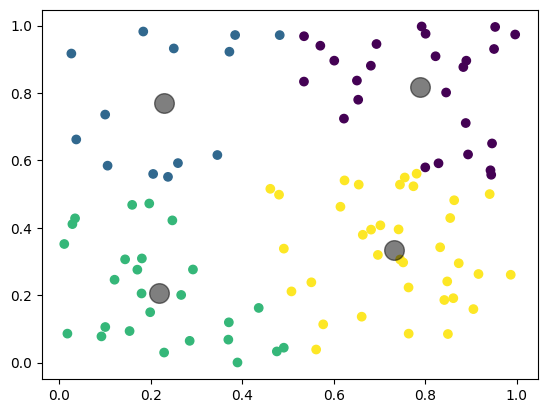

In [4]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


# **3. Gaussian Mixture Models Theory and Basic Code**

## Gaussian Mixture Models (GMM) {cite}`bishop2006pattern`

### Introduction to Gaussian Mixture Models

Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. The model assumes that the data is generated from a mixture of several Gaussian distributions, each with its own mean and variance {cite}`reynolds2009gaussian, mclachlan2004finite`. GMMs are widely used for clustering and density estimation, as they provide a method for representing complex distributions through the combination of simpler ones.

### Why Gaussian Mixture Models for Clustering?

Gaussian Mixture Models are particularly powerful in scenarios where:

- **Soft clustering is needed**: Unlike K-means, GMM provides the probability of each data point belonging to each cluster, offering a soft classification and understanding of the uncertainties in our data.
- **Flexibility in cluster covariance**: GMM allows for clusters to have different sizes and different shapes, making it more flexible to capture the true variance in the data.

### Key Components of GMM

1. **Number of Components (Gaussians)**: Similar to K in K-means, the number of Gaussians (components) is a parameter that needs to be set.
2. **Expectation-Maximization (EM) Algorithm**: GMMs use the EM algorithm for fitting, iteratively improving the likelihood of the data given the model.
3. **Covariance Type**: The shape, size, and orientation of the clusters are determined by the covariance type of the Gaussians (e.g., spherical, diagonal, tied, or full covariance).

### The EM Algorithm in GMM

The Expectation-Maximization (EM) algorithm is a two-step process:

- **Expectation Step (E-step)**: Calculate the probability that each data point belongs to each cluster.
- **Maximization Step (M-step)**: Update the parameters of the Gaussians (mean, covariance, and mixing coefficient) to maximize the likelihood of the data given these assignments.

This process is repeated until convergence, meaning the parameters do not significantly change from one iteration to the next.

### Advantages of GMM

- **Soft Clustering**: Provides a probabilistic framework for soft clustering, giving more information about the uncertainties in the data assignments.
- **Cluster Shape Flexibility**: Can adapt to ellipsoidal cluster shapes, thanks to the flexible covariance structure.

### Basic Code Implementation

Below, you'll find a basic implementation of the Gaussian Mixture Model. This should serve as an initial guide for understanding the model and applying it to your data analysis projects.


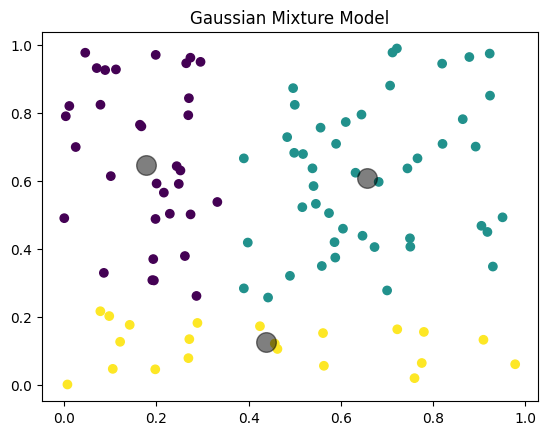

In [5]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()


# **4. Image Classification - Sentinel 2 Optical**

Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.



## **4.1 K-Means Implementation on Image pixels **

first we load in our Sentinel-2 image using **rasterio** and **numpy**. We the use the K-means implementation on the image's pixels to cluster them into 2 classes, Sea ice and Leads.  

It does this by reshaping the image into a list of 2D pixel vectors, then fitting K-means and reshaping the cluster labels back into image form.

It gives an output of a labled image with each pixel being assigned to a cluster ID. Below you will find a plot showing the clustered regions.

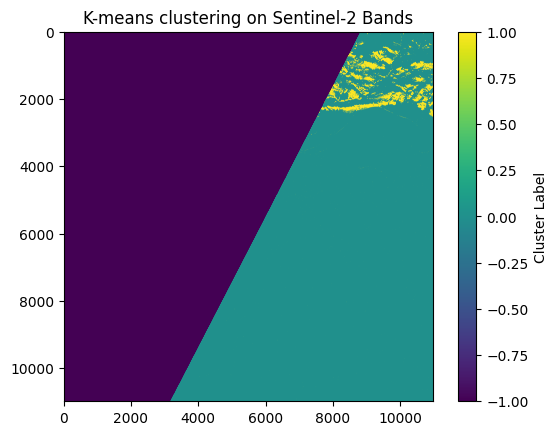

In [6]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
##########ADD PATH BELOW ###########################################################
base_path = "/content/drive/MyDrive/AI Earth Observation /Week 4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()

del kmeans, labels, band_data, band_stack, valid_data_mask, X, labels_image


### Interpretation of clusters

The unsupervised clustering separates the radar echoes into two distinct clusters.
By examining the average echo characteristics and signal strength, the clusters can be
interpreted as representing different surface types.

The cluster with higher backscatter and a sharper echo peak is interpreted as **sea ice**,
while the cluster with lower backscatter and a broader echo shape is interpreted as **leads**.


## **4.2 GMM Implementation on Image Pixels**
In this case we perform the same clustering task as we did in 4.1 however with a GMM. We fit a GMM model to pixel features and produce a label image.

We now have another label image we can compare to the k means plot we created earlier.


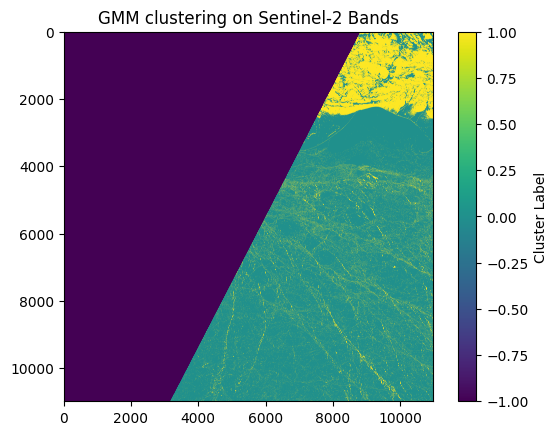

In [7]:
import rasterio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Paths to the band images
###############################ADD PATH BELOW###################################
base_path = "/content/drive/MyDrive/AI Earth Observation /Week 4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for GMM, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# GMM clustering
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


###Interpretation of Clusters

it is apparent that the GMM clustering provides more detail than the K-means clustering in 4.1. This may be because GMM models the full distribution of the data (mean, variance, and uncertainty), rather than assigning points only based on distance to a cluster center like K-means.

# **5. Altimetry Classification (Sentinel-3) **
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

## **5.1 Read in Functions Needed**
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

##**5.2 Loading Waveform & Meta Data Arrays**
This helper function computes a feature called peakiness for each altimetry waveform. But first, what is a **waveform** and what even is '**peakiness**'?

What is “**peakiness**”?
It’s a simple number that tells you how “spiky” a waveform is:
peakiness = (maximum value above noise floor) / (mean value above noise floor)

A **waveform** with one strong narrow return tends to have high peakiness, while broader/rougher returns tend to have lower peakiness. This is useful as a feature for separating different surface types (e.g., leads vs sea ice) before clustering.


### What this function is actually doing...
This function measures how “peaky” each altimetry waveform is.

For every waveform, it: finds the strongest return, looks at a small region around that peak, estimates the background noise level, keeps only the signal above the noise, and computes peakiness as the ratio between the strongest signal and the average signal.

The result is one peakiness value per waveform, which can then be used as an input feature for clustering or classification.
If requested, the function can also plot example waveforms and visually show how peakiness is calculated!

In [ ]:
#*args and **kwargs allow you to pass an unspecified number of arguments to a function,
#so when writing the function definition, you do not need to know how many arguments will be passed to your function
#**kwargs allows you to pass keyworded variable length of arguments to a function.
#You should use **kwargs if you want to handle named arguments in a function.
#double star allows us to pass through keyword arguments (and any number of them).
def peakiness(waves, **kwargs):

    "finds peakiness of waveforms."

    #print("Beginning peakiness")
    # Kwargs are:
    #          wf_plots. specify a number n: wf_plots=n, to show the first n waveform plots. \

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import time

    print("Running peakiness function...")

    size=np.shape(waves)[0] #.shape property is a tuple of length .ndim containing the length of each dimensions
                            #Tuple of array dimensions.

    waves1=np.copy(waves)

    if waves1.ndim == 1: #number of array dimensions
        print('only one waveform in file')
        waves2=waves1.reshape(1,np.size(waves1)) #numpy.reshape(a, newshape, order='C'), a=array to be reshaped
        waves1=waves2

    # *args is used to send a non-keyworded variable length argument list to the function
    def by_row(waves, *args):
        "calculate peakiness for each waveform"
        maximum=np.nanmax(waves)
        if maximum > 0:

            maximum_bin=np.where(waves==maximum)
            #print(maximum_bin)
            maximum_bin=maximum_bin[0][0]
            waves_128=waves[maximum_bin-50:maximum_bin+78]

            waves=waves_128

            noise_floor=np.nanmean(waves[10:20])
            where_above_nf=np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum=np.nanmax(waves[where_above_nf])
                total=np.sum(waves[where_above_nf])
                mean=np.nanmean(waves[where_above_nf])
                peaky=maximum/mean

            else:
                peaky = np.nan
                maximum = np.nan
                total = np.nan

        else:
            peaky = np.nan
            maximum = np.nan
            total = np.nan

        if 'maxs' in args:
            return maximum
        if 'totals' in args:
            return total
        if 'peaky' in args:
            return peaky

    peaky=np.apply_along_axis(by_row, 1, waves1, 'peaky') #numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)

    if 'wf_plots' in kwargs:
        maximums=np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals=np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0,kwargs['wf_plots']):
            if i == 0:
                print("Plotting first "+str(kwargs['wf_plots'])+" waveforms")

            plt.plot(waves1[i,:])#, a, col[i],label=label[i])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5,maximums[i],"maximum="+str(maximums[i]))
            plt.text(5,maximums[i]-2500,"total="+str(totals[i]))
            plt.text(5,maximums[i]-5000,"peakiness="+str(peaky[i]))
            plt.title('waveform '+str(i)+' of '+str(size)+'\n. Noise floor average taken between red lines.')
            plt.show()


    return peaky


##**5.3 Preparing Sentinetal-3 Variables for analysis **

This helper function prepares Sentinel-3 altimetry variables so they can be used together in the analysis.

Altimetry data is stored at different time resolutions (for example 1 Hz and 20 Hz). To combine variables correctly, they must all be on the same time grid. This function makes sure that happens.

###What this function actually does:
 Reads the requested variable from the altimetry dataset, converts masked or missing values into NaN so they don’t break calculations, checks whether the variable is stored at 1 Hz, or 20 Hz C-band...
If needed, it interpolates the variable so it matches the 20 Hz Ku-band time grid and finally returns the variable as a clean NumPy array at the correct resolution.

In [ ]:
def unpack_gpod(variable):

    from scipy.interpolate import interp1d

    time_1hz=SAR_data.variables['time_01'][:]
    time_20hz=SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out=(SAR_data.variables[variable][:]).astype(float)  # convert from integer array to float.

    #if ma.is_masked(dataset.variables[variable][:]) == True:
    #print(variable,'is masked. Removing mask and replacing masked values with nan')
    out=np.ma.filled(out, np.nan)

    if len(out)==len(time_1hz):

        print(variable,'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz,out,fill_value="extrapolate")(time_20hz)

    if len(out)==len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC,out,fill_value="extrapolate")(time_20hz)
    return out


##**5.4 Calculating SSD for each waveform**

This function calculates a feature called **SSD** for each waveform in the input array. **SSD is a measure of how wide or spread out a waveform is, which helps distinguish between different surface types in altimetry data.**

The function works by looping over each waveform and first cleaning it by replacing missing values (NaN) with zeros. It then estimates where the centre of the waveform is and how wide it appears based on the signal distribution. Using these estimates, the function fits a Gaussian curve to the waveform. The width of this fitted Gaussian (the sigma value) is taken as the SSD value for that waveform.

If the Gaussian fit fails, the function safely skips that waveform and leaves its SSD value as missing. This prevents errors from stopping the whole process. There is also an optional plotting mode (disabled by default) that can be turned on to visually inspect the waveform, the fitted Gaussian, and the estimated width.

The final output is a one-dimensional NumPy array containing one SSD value per waveform. These SSD values are later used as numerical features for clustering or classification of altimetry measurements.

In [8]:


def calculate_SSD(RIP):

    from scipy.optimize import curve_fit
    # from scipy import asarray as ar,exp
    from numpy import asarray as ar, exp

    do_plot='Off'

    def gaussian(x,a,x0,sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD=np.zeros(np.shape(RIP)[0])*np.nan
    x=np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):

        y=np.copy(RIP[i])
        y[(np.isnan(y)==True)]=0

        if 'popt' in locals():
            del(popt,pcov)

        SSD_calc=0.5*(np.sum(y**2)*np.sum(y**2)/np.sum(y**4))
        #print('SSD calculated from equation',SSD)

        #n = len(x)
        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))
        #print('est. mean',mean,'est. sigma',sigma_est)

        try:
            popt,pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est],maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: "+str(e))
            #plt.plot(y)
            #plt.show()

        except TypeError as t:
            print("Gaussian SSD curve-fit error: "+str(t))

        if do_plot=='ON':

            plt.plot(x,y)
            plt.plot(x,gaussian(x,*popt),'ro:',label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

            print('popt',popt)
            print('curve fit SSD',popt[2])

        if 'popt' in locals():
            SSD[i]=abs(popt[2])


    return SSD


## **5.5 Altimetry data prep for unsupervised learning**

This section loads the Sentinel-3 altimetry dataset and extracts the variables needed for analysis. The altimetry file is opened from disk and key measurements such as latitude, longitude, waveforms, backscatter, and range-integrated power are unpacked and aligned to the same 20 Hz Ku-band time grid. Invalid data points are then removed to ensure that only meaningful measurements are used in the analysis.

Next, additional features are calculated from the waveforms to better describe their physical characteristics. Peakiness is computed to measure how sharp each waveform is, and SSD is calculated to estimate how spread out each waveform is. These features are combined with the backscatter values into a single data matrix, which is then standardised so that all features are on comparable scales. The resulting dataset is ready to be used for unsupervised clustering methods.

In [9]:
########################## ADD PATH BELOW ###############################################

path = '/content/drive/MyDrive/AI Earth Observation /Week 4'
SAR_file = 'S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3'

SAR_data = Dataset(path + '/' + SAR_file + '/enhanced_measurement.nc')

SAR_lat = unpack_gpod('lat_20_ku')
SAR_lon = unpack_gpod('lon_20_ku')
waves   = unpack_gpod('waveform_20_ku')
sig_0   = unpack_gpod('sig0_water_20_ku')
RIP     = unpack_gpod('rip_20_ku')
flag = unpack_gpod('surf_type_class_20_ku')

# Filter out bad data points using criteria (here, lat >= -99999)
find = np.where(SAR_lat >= -99999)
SAR_lat = SAR_lat[find]
SAR_lon = SAR_lon[find]
waves   = waves[find]
sig_0   = sig_0[find]
RIP     = RIP[find]

# Calculate additional features
PP = peakiness(waves)
SSD = calculate_SSD(RIP)

# Convert to numpy arrays (if not already)
sig_0_np = np.array(sig_0)
PP_np    = np.array(PP)
SSD_np   = np.array(SSD)

# Create data matrix
data = np.column_stack((sig_0_np, PP_np, SSD_np))

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

Running peakiness function...


/tmp/ipython-input-448542667.py:63: RuntimeWarning: Mean of empty slice
  noise_floor=np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.


# **6. What you have learned... **🎉
In this notebook, unsupervised learning techniques were used to explore Earth observation data without relying on predefined labels. **The data was prepared, cleaned, and transformed into meaningful features that describe the physical behaviour of satellite signals.**

By applying clustering methods, the notebook demonstrates **how different surface types can be identified based on their signal characteristics**. Completing this workflow gives you practical experience in feature extraction, unsupervised analysis, and interpreting satellite data in a physically meaningful way!

# **7. What can you explore next? **🧠🧑‍💻✨📚
This notebook provides a foundation for applying unsupervised learning to Earth observation data, but there are many ways to build on this work. **You could experiment with different numbers of clusters to explore finer surface distinctions, or test alternative feature combinations to see how they affect the clustering results.**

Another natural next step is to **compare these unsupervised results with labelled reference data**, where available, to assess performance more quantitatively. More advanced methods such as  supervised learning models could also be explored to extend the analysis further and deepen understanding of satellite signal behaviour.